# Introduction to Numerical Python

The numpy (numerical Python) package is an extensive set of tools for working with arrays in Python. numpy is at the heart of efficient data science and scientific computation in Python.

## Arrays

Numpy arrays are like lists, but better for fast numerical computation. Let's first compare them to lists.

In [16]:
#Suppose we want to add two lists pointwise
L1=[1,2,3]
L2=[4,5,6]

#We would have to write a function
def addition(L1,L2):
    return [L1[i]+L2[i] for i in range(len(L1))]

addition(L1,L2)


[5, 7, 9]

__Numpy arrays__ are like lists, but have predefined addition functions (as well as many other functions)

In [17]:
#In order to use numpy we need to import it. We will type the following line nearly ever lecture for the rest of the quarter
import numpy as np

a1=np.array(L1)
a2=np.array(L2)

print(a1)

[1 2 3]


a1 and a2 look like lists, but they are actually numpy arrays

In [18]:
type(a1)

numpy.ndarray

We can add numpy arrays, the + operator. No need to write a custom function

In [19]:
a1+a2

array([5, 7, 9])

We also have scalar multiplication

In [20]:
3*a1

array([3, 6, 9])

The numpy module doesn't just save us the work of writing our own functions, it is __faster__

In [21]:
#Create a list and array of length(1000)
L1=list(range(1000))
L2=list(range(1000))
a1=np.array(L1)
a2=np.array(L2)

#%timeit computes the average time it takes to run a line of code
%timeit addition(L1,L2)


149 µs ± 6.02 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [22]:
%timeit a1+a2

1.75 µs ± 92.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


As we can see, numpy arrays are MUCH faster. (Recall that a 1000 nanoseconds is one microsecond.)

-  The numpy module was written in C
-  Items of an array are stored next to each other. (This comes at a cost)

In [23]:
#You can make lists of mixed type
L=[1,2.3,"cat",[3,4]]

type(L[0]),type(L[1]),type(L[3])

(int, float, list)

Numpy arrays require all entries to be in the same type. If one entry is a float all must be a float





In [24]:
a=np.array([1,2,3,4.0])
type(a[0])

numpy.float64

Typically, numpy arrays are only for numerical input, but the following is technically allowed

In [25]:
stringarray=np.array(["cat","dog","zebra"])

In [26]:
type(stringarray)

numpy.ndarray

## Vectorization

You might have noticed that, in the code above, we were able to do a1 + a2 and get the expected result. As you may have seen already, this doesn't exactly work for lists: L1 + L2 concatenates the lists, rather than computing the entrywise sum.

A vectorized function is one that operates on all elements of an array in entrywise fashion. So, we saw above that the + function, when applied to arrays, is vectorized. The numpy module includes a large number of vectorized functions. These should almost always be used when working with arrays:



In [27]:
#recall a1 and a2
a1=np.array([1,2,3])
a2=np.array([4,5,6])

In [28]:
#addition
a1+a2

array([5, 7, 9])

In [29]:
#pointwise multiplication
a1*a2

array([ 4, 10, 18])

In [30]:
#scalar addition
a1+10

#10+a1 does the same

array([11, 12, 13])

In [31]:
#scalar mutliplcation
a1*10

array([10, 20, 30])

### Other vectorized functions

In [32]:
#this line gives you 101 equally spaced points between 0 and 2*pi

x=np.linspace(0,2*np.pi,101)
#x

In [33]:
y=np.sin(x)
#y

Each entry of y is the sine of the corresponding entry of x. To see how this works, we will use some plotting tools. Don't worry if you don't understand some of the code below, we will discuss plotting much more thoroughly later

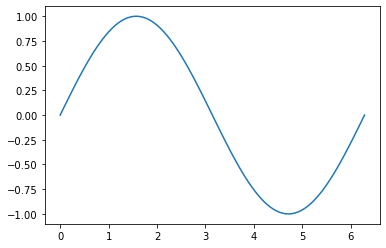

In [34]:
#an import needed to use plotting tools
from matplotlib import pyplot as plt

#makes a line plot
plt.plot(x,y)

We did this all with one line of code y=np.sin(x) and our solution was much faster than the ``old-fashioned" way

In [35]:
import math

def list_sine(L):
    answer = [math.sin(L[i]) for i in range(len(L))]

In [36]:
L=list(range(100))
a=np.array(L)


In [37]:
%timeit Listy=list_sine(L)

26.9 µs ± 5.82 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [38]:
%timeit b=np.sin(a)

2.54 µs ± 589 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


__Caution__: Arrays are only faster if you use the built in functions. Recall that earlier we defined an addition function which used a for loop 

In [39]:
%timeit addition(L,L)

14.8 µs ± 3.37 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [40]:
%timeit addition(a,a)

53.7 µs ± 6.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


This leades us to two rules of numpy arrays

-  __When possible use built in functions__

-  __Try to avoid looping over the entries of an array__ 